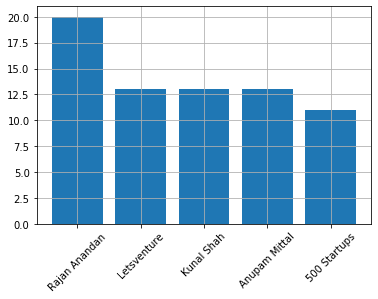

In [5]:
'''
Q.4
Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for 
your friend. So you went to your investor friend to understand the situation better and your investor 
friend explained to you about the different Investment Types and their features. This new information will 
be helpful in finding the right investor. Since your friend startup is at an early stage startup, 
the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have 
invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. 
Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". 
Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are 
many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Answer: Following the previous steps and here I just need to filter out the InvestmentType which are other than
'Seed Funding and Crowd Funding'. To make sure I don't miss out any first I have correct spelling of all the 
InvestmentType by using updateType. So once I get all the proper InvestmentType I can apply the filter so i did 
that using boolean indexing, I have taken only those rows wherein InvestmentType is Seed Fuding or Crowd Funding.
Once that is done, now I have followed the previous step which I had followed in Q.3 to figure out all the different
startup wherein investor has invested. And followed the process till I get the top five Investors.  After ploting
the bar graph I have found that Rajan Anandan did the highest number of investment as Seed funding or crowd funding so
it will be better to approach Rajan Anandan. 

'''


# Packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


# City Locations where startup can be estabilished 
target_locations = {'Bangalore','Mumbai','Gurgaon','Noida','New Delhi'}

# City Name Extraction 
def city_name(name):
    return name.split('/')[0].strip()

# Filter Cities and make other null
def filter_city(city):
    if city in target_locations:
        return city
    return ''


# Investors name and how many times invested in differnt startups
investors = {}

def startup_investors(startup_investor):
    startup_investor = str(startup_investor)
    startupname = startup_investor.split('###')[0].strip().title()
    investornames = startup_investor.split('###')[1]
    investornames = investornames.split(',')
    for name in investornames:
        name = name.strip().title()
        if name!='' and 'Undisclosed' not in name:
            if investors.get(name) is None:
                investors[name] = set([startupname])
            else:
                if startupname not in investors[name]:
                    investors[name].add(startupname)
    return startup_investor

# Update Investment Type Name
def updateType(investtype):
    if investtype=='SeedFunding':
        return 'Seed Funding'
    if investtype=='Crowd funding':
        return 'Crowd Funding'
    if investtype=='PrivateEquity':
        return 'Private Equity'
    return investtype

# Update Startup Names
def updateStartupName(name):
    oyonames = {'Oyo Rooms','OYO Rooms','OyoRooms','Oyorooms','Oyo'}
    olanames = {'Olacabs','Ola','Ola Cabs'}
    flipkartnames = {'Flipkart.com','Flipkart'}
    paytmnames = {'Paytm','Paytm Marketplace'}
    if name in oyonames:
        return 'Oyo'
    if name in olanames:
        return 'Ola'
    if name in flipkartnames:
        return 'Flipkart'
    if name in paytmnames:
        return 'Paytm'
    return name

# Load Data
df_startups=pd.read_csv('startup_funding.csv',encoding='utf-8') 

# Drop null valued rows wherein InvestmentType is null
df_startups = df_startups[pd.notna(df_startups['InvestmentType'])]

# Update with proper investment type
df_startups["InvestmentType"] = df_startups["InvestmentType"].apply(updateType)

# Filter out only Seed Funding and Crowd Funding
df_startups = df_startups[(df_startups['InvestmentType']=='Seed Funding') | (df_startups['InvestmentType']=='Crowd Funding')]


# Drop all rows wherein no startup name or investor name is present
df_startups = df_startups[pd.notna(df_startups['InvestorsName'])]
df_startups = df_startups[pd.notna(df_startups['StartupName'])]


# Drop all rows wherein city name is missing
df_startups['CityLocation'].dropna(inplace = True) 

# Get Location Names
df_startups['CityLocation'] = df_startups['CityLocation'].apply(city_name) # First City Name

# Handle Case Sensitive and Proper Name 
df_startups['CityLocation'].replace('Delhi','New Delhi', inplace = True) 
df_startups['CityLocation'].replace('bangalore','Bangalore',inplace = True)


# Only cities where friend wants to estabilish startup.
df_startups['CityLocation'] = df_startups['CityLocation'].apply(filter_city)
index = df_startups[df_startups['CityLocation']==''].index
df_startups.drop(index,inplace=True)




# Update with proper startup name
df_startups['StartupName'] = df_startups['StartupName'].apply(updateStartupName)

# Combine the startup name and investor names 
df_startups['startup_investor'] = df_startups['StartupName'] + '###' + df_startups['InvestorsName']
df_startups['startup_investor'] = df_startups['startup_investor'].apply(startup_investors)


investor_counts = [[len(value),key]for key, value in investors.items()]
investor_counts.sort(reverse=True)

# Ignore Undisclosed Investor
investor = [ i[1] for i in investor_counts[1:6]]
counts = [ i[0] for i in investor_counts[1:6]]

plt.bar(investor,counts)
plt.xticks(rotation=45)
plt.grid()
plt.show()
